<a href="https://colab.research.google.com/github/head1ton/kaggle_dev/blob/master/%EC%83%9D%EC%A1%B4%ED%99%95%EB%A5%A0%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./test.csv
./train.csv
./.config/.last_update_check.json
./.config/.last_survey_prompt.yaml
./.config/gce
./.config/config_sentinel
./.config/active_config
./.config/.metricsUUID
./.config/configurations/config_default
./.config/logs/2019.12.18/16.52.31.147337.log
./.config/logs/2019.12.18/16.52.35.435000.log
./.config/logs/2019.12.18/16.52.05.166856.log
./.config/logs/2019.12.18/16.52.20.616768.log
./.config/logs/2019.12.18/16.52.34.414154.log
./sample_data/README.md
./sample_data/anscombe.json
./sample_data/mnist_train_small.csv
./sample_data/california_housing_train.csv
./sample_data/california_housing_test.csv
./sample_data/mnist_test.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [204]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [206]:
train.shape

(891, 12)

In [207]:
test.shape

(418, 11)

In [208]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [209]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [210]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pengelly, Mr. Frederick William",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [211]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [212]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [213]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [214]:
survived = train[train['Survived'] == 1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [215]:
not_survived = train[train['Survived'] == 0]
not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [216]:
print('Survived: %i (%.1f%%)' %(len(survived), float(len(survived))/len(train)*100.0))
print('Not Survived: %i (%.1f%%)' %(len(not_survived), float(len(not_survived))/len(train)*100.0))
print('Total: %i' %(len(train)))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


Pclass vs Survival

In [217]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


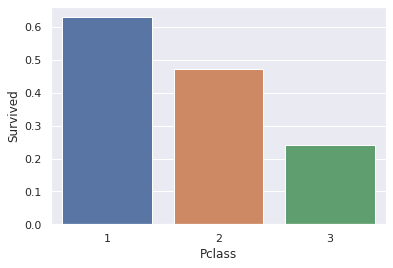

In [218]:
sns.barplot(x='Pclass', y='Survived', data=train, ci=None)

Sex vs Survival

In [219]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


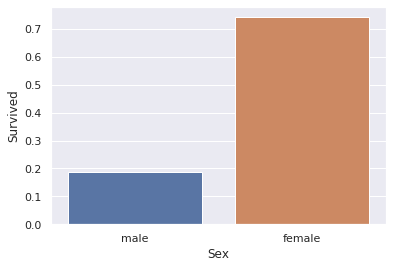

In [220]:
sns.barplot(x='Sex', y='Survived', data=train, ci=None)

Pclass vs Sex vs Survival

In [221]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
print(tab)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


In [222]:
tab.sum(1).astype(float)

Pclass
1    216.0
2    184.0
3    491.0
dtype: float64

In [223]:
tab.div(tab.sum(1).astype(float), axis=0)

Sex,female,male
Pclass,,
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721


In [224]:
94/216.0

0.4351851851851852

In [225]:
tab.sum(0).astype(float)

Sex
female    314.0
male      577.0
dtype: float64

In [226]:
tab.sum().astype(float)

Sex
female    314.0
male      577.0
dtype: float64

Text(0, 0.5, 'Percentage')

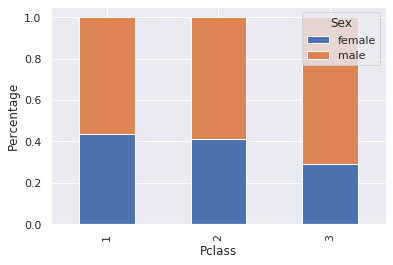

In [227]:
tab.div(tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')

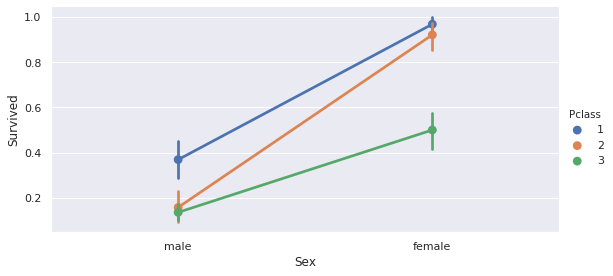

In [228]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=2, data=train)

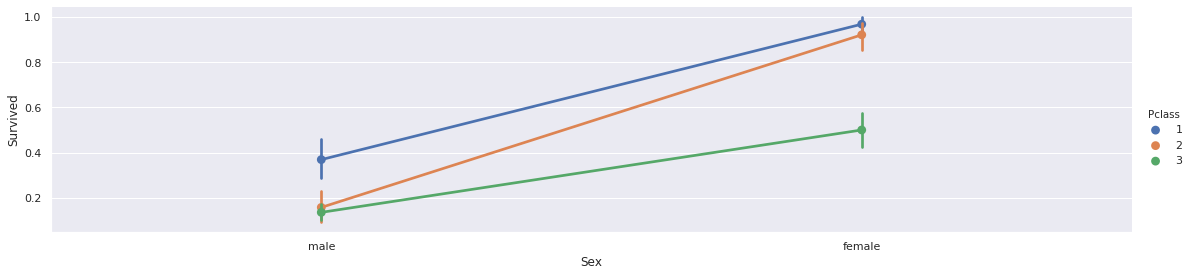

In [229]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=4, aspect=4, data=train)

Embarked vs Survival

In [230]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


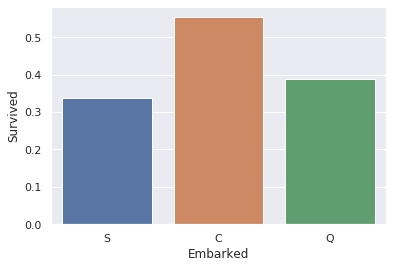

In [231]:
sns.barplot(x='Embarked', y='Survived', data=train, ci=None)

Pclass, Sex & Embarked vs Survival

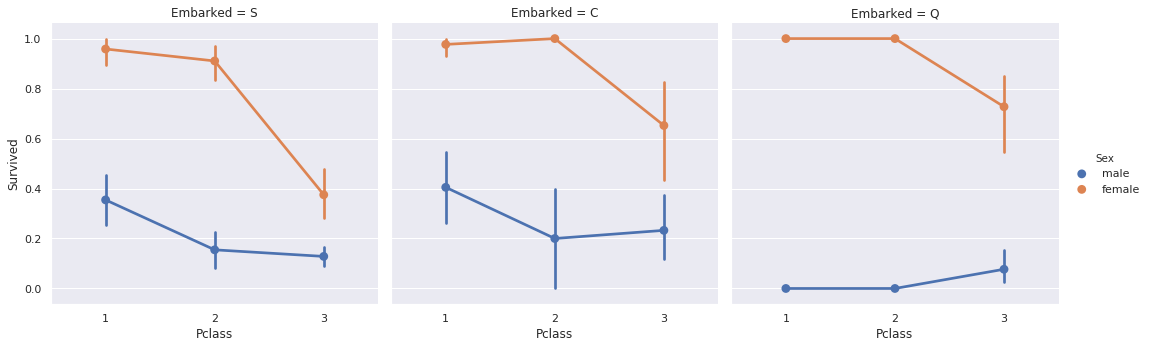

In [232]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

* Pclass 1과 Pclass 2 여자들은 거의 살아남음
* Pclass 3 여자들은 거의 살아남지 못함
* 남자들은 Pclass 1 을 제외하고 거의 살아나지 못함

Parch vs Survival

In [233]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


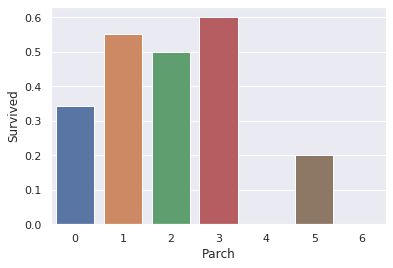

In [234]:
sns.barplot(x='Parch', y='Survived', data=train, ci=None)

SibSp vs Survival

In [235]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


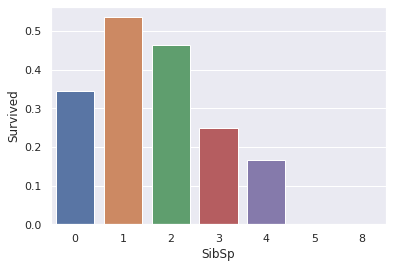

In [236]:
sns.barplot(x='SibSp', y='Survived', data=train, ci=None)

Age vs Survival

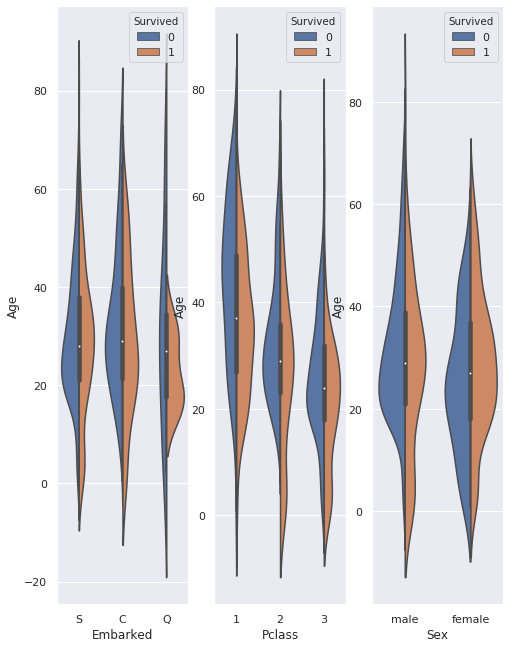

In [237]:
fig = plt.figure(figsize=(8, 11))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x='Embarked', y='Age', hue='Survived', data=train, ax=ax1, split=True)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, ax=ax2, split=True)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train, ax=ax3, split=True)

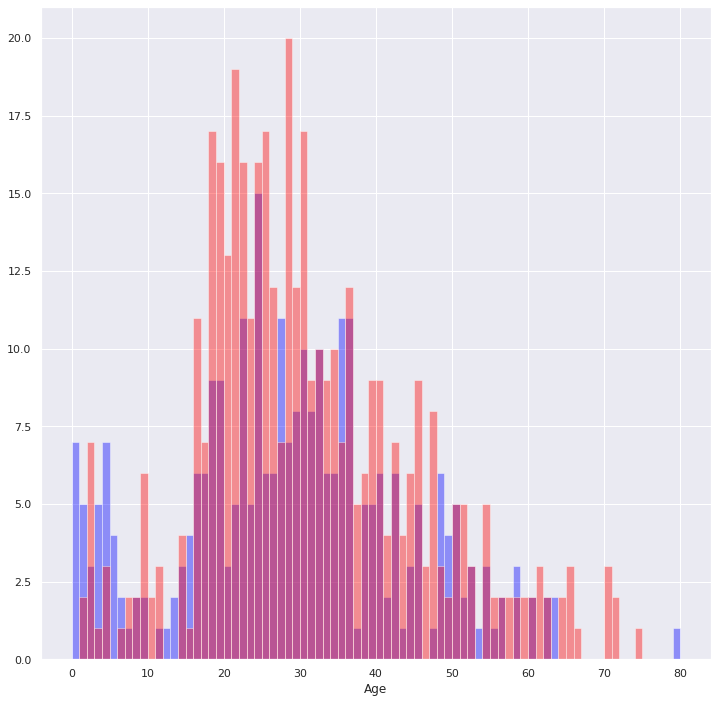

In [238]:
total_survived = train[train['Survived']==1]
total_not_survived = train[train['Survived']==0]
plt.figure(figsize=(12,12))
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(total_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age')

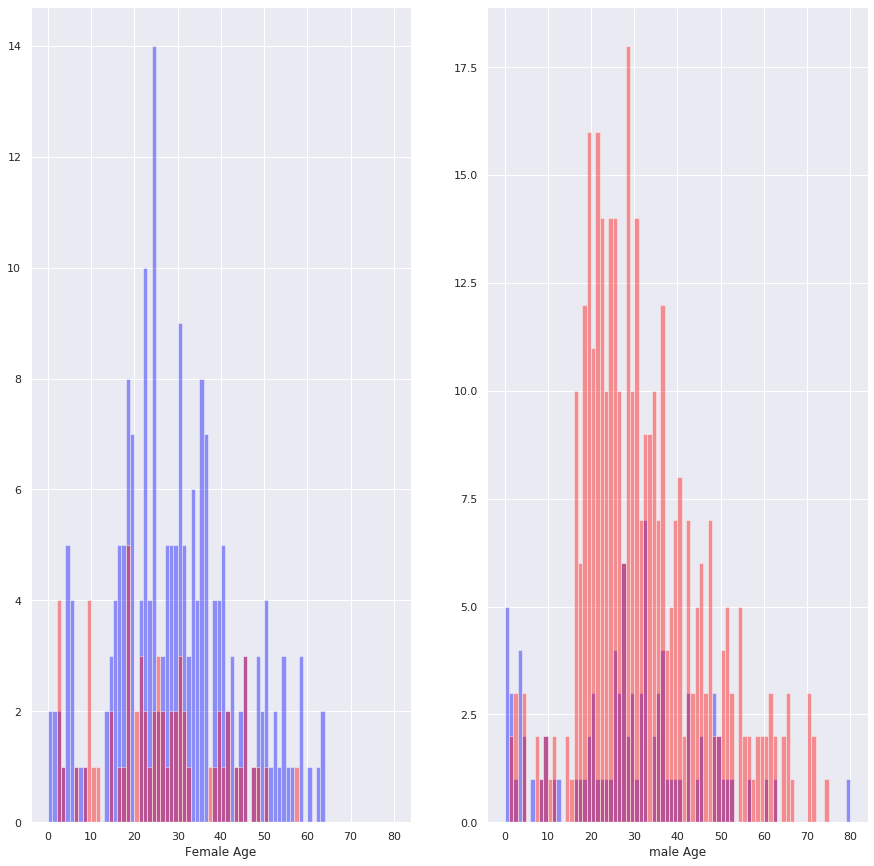

In [239]:
male_survived = train[(train['Survived']==1) & (train['Sex']=='male')]
female_survived = train[(train['Survived']==1) & (train['Sex']=='female')]
male_not_survived = train[(train['Survived']==0) & (train['Sex']=='male')]
female_not_survived = train[(train['Survived']==0) & (train['Sex']=='female')]

plt.figure(figsize=(15,15))
plt.subplot(121)
sns.distplot(female_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(female_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Female Age')

plt.subplot(122)
sns.distplot(male_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(male_not_survived['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='male Age')

Correlating Features

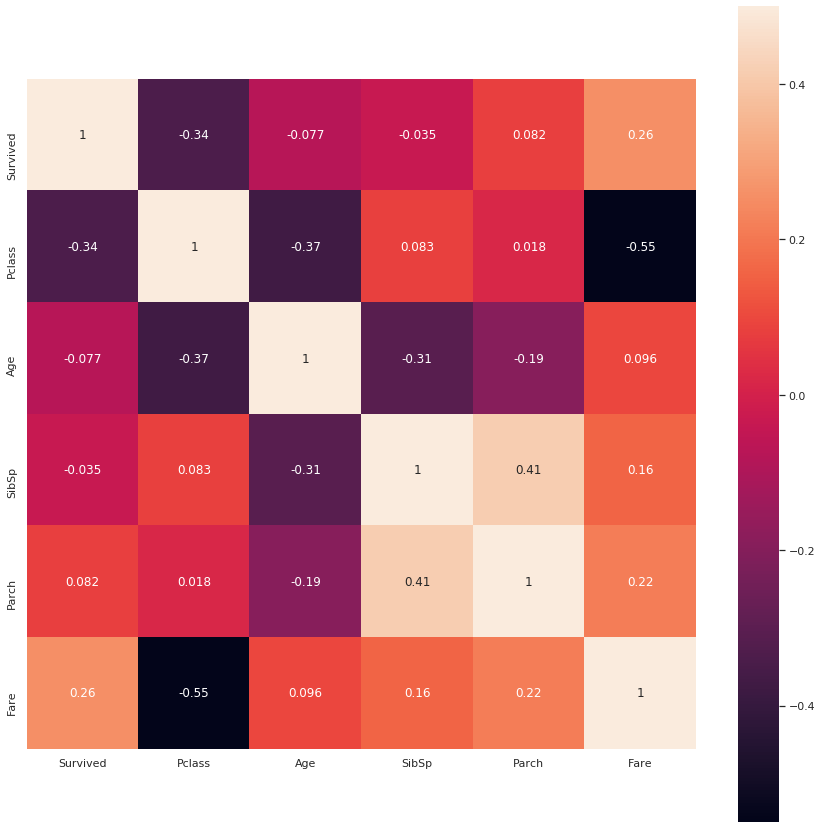

In [240]:
plt.figure(figsize=(15,15))
sns.heatmap(train.drop('PassengerId', axis=1).corr(), vmax=0.5, square=True, annot=True)

Features Extraction

In [0]:
train_test_data = [train, test]

Title

In [0]:
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

In [243]:
dataset['Title']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [244]:
dataset.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
166,1058,1,"Brandeis, Mr. Emil",male,48.0,0,0,PC 17591,50.4958,B10,C,Mr
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
50,942,1,"Smith, Mr. Lucien Philip",male,24.0,1,0,13695,60.0000,C31,S,Mr
135,1027,3,"Carlsson, Mr. Carl Robert",male,24.0,0,0,350409,7.8542,NaN,S,Mr
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,Mrs


In [245]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [246]:
np.arange(0, 81, 1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

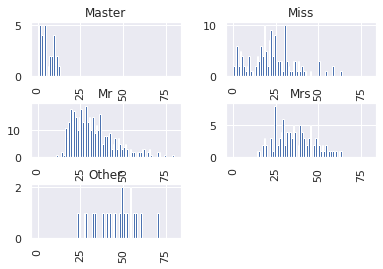

In [247]:
dist_age_title = train['Age'].hist(by=train['Title'], bins=np.arange(0, 81, 1))

In [248]:
train[train['Title']=='Master']['Age'].max()

12.0

In [249]:
test[test['Title']=='Master']['Age'].max()

14.5

In [0]:
def get_person(passenger):
    age, sex = passenger
    return 'child' if age < 16 else sex

for dataset in train_test_data:
    dataset['Person'] = dataset[['Age', 'Sex']].apply(get_person, axis=1)

In [251]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr,male
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,Mrs,female
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,Mr,male
511,512,0,3,"Webber, Mr. James",male,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,S,Mr,male
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,Master,child


In [252]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
52,944,2,"Hocking, Miss. Ellen Nellie""""",female,20.0,2,1,29105,23.0000,NaN,S,Miss,female
325,1217,3,"Assam, Mr. Ali",male,23.0,0,0,SOTON/O.Q. 3101309,7.0500,NaN,S,Mr,male
381,1273,3,"Foley, Mr. Joseph",male,26.0,0,0,330910,7.8792,NaN,Q,Mr,male
319,1211,2,"Jefferys, Mr. Ernest Wilfred",male,22.0,2,0,C.A. 31029,31.5000,NaN,S,Mr,male
335,1227,1,"Maguire, Mr. John Edward",male,30.0,0,0,110469,26.0000,C106,S,Mr,male


In [0]:
for dataset in train_test_data:
    dataset['Person'][np.isnan(dataset['Age']) & (dataset['Title']=='Master')] = 'child'
    dataset['Person'][np.isnan(dataset['Age']) & (dataset['Title']!='Master')] = dataset['Sex']

In [254]:
np.isnan(np.nan)

True

In [255]:
np.isnan(0)

False

In [0]:
title_mapping = {"Mr":1, "Miss":2, "Mrs":3, "Master":4, "Other":5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [0]:
for dataset in train_test_data:
    dataset['Person'] = dataset['Person'].map({'child':0, 'female':1, 'male':2}).astype(int)

In [258]:
train[['Person', 'Survived']].groupby(['Person'], as_index=False).mean()

,Person,Survived
0,0,0.586207
1,1,0.756458
2,2,0.161351


Sex

In [0]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

In [260]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",0,43.0,1,6,CA 2144,46.9000,NaN,S,3,1
868,869,0,3,"van Melkebeke, Mr. Philemon",1,NaN,0,0,345777,9.5000,NaN,S,1,2
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",1,36.0,1,0,349910,15.5500,NaN,S,1,2
531,532,0,3,"Toufik, Mr. Nakli",1,NaN,0,0,2641,7.2292,NaN,C,1,2
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",0,24.0,0,0,248733,13.0000,F33,S,2,1


In [261]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
376,1268,3,"Kink, Miss. Maria",0,22.0,2,0,315152,8.6625,NaN,S,2,1
93,985,3,"Guest, Mr. Robert",1,NaN,0,0,376563,8.0500,NaN,S,1,2
326,1218,2,"Becker, Miss. Ruth Elizabeth",0,12.0,2,1,230136,39.0000,F4,S,2,0
135,1027,3,"Carlsson, Mr. Carl Robert",1,24.0,0,0,350409,7.8542,NaN,S,1,2
62,954,3,"Bjorklund, Mr. Ernst Herbert",1,18.0,0,0,347090,7.7500,NaN,S,1,2


Embarked

In [262]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [0]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

Age

In [265]:
train['Age'][np.isnan(train['Age'])].head(10)

5    NaN
17   NaN
19   NaN
26   NaN
28   NaN
29   NaN
31   NaN
32   NaN
36   NaN
42   NaN
Name: Age, dtype: float64

In [266]:
train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [0]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()

    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

train['AgeBand'] = pd.cut(train['Age'], 5)

In [0]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

Fare

In [0]:
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

In [270]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
print(train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [0]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [272]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person,AgeBand,FareBand
795,796,0,2,"Otter, Mr. Richard",1,2,0,0,28213,1,NaN,0,1,2,"(32.0, 48.0]","(7.91, 14.454]"
619,620,0,2,"Gavey, Mr. Lawrence",1,1,0,0,31028,1,NaN,0,1,2,"(16.0, 32.0]","(7.91, 14.454]"
673,674,1,2,"Wilhelms, Mr. Charles",1,1,0,0,244270,1,NaN,0,1,2,"(16.0, 32.0]","(7.91, 14.454]"
372,373,0,3,"Beavan, Mr. William Thomas",1,1,0,0,323951,1,NaN,0,1,2,"(16.0, 32.0]","(7.91, 14.454]"
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",1,0,2,0,345764,2,NaN,0,1,2,"(-0.08, 16.0]","(14.454, 31.0]"


In [273]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Person
207,1099,2,"Collett, Mr. Sidney C Stuart",1,1,0,0,28034,1,NaN,0,1,2
56,948,3,"Cor, Mr. Bartol",1,2,0,0,349230,0,NaN,0,1,2
64,956,1,"Ryerson, Master. John Borie",1,0,2,2,PC 17608,3,B57 B59 B63 B66,1,4,0
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",0,3,1,1,112901,2,B26,0,3,1
149,1041,2,"Lahtinen, Rev. William",1,1,1,1,250651,2,NaN,0,5,2


FamilySize vs Survival

In [274]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


IsAlone

In [275]:
for dataset in train_test_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


Relationship between Features

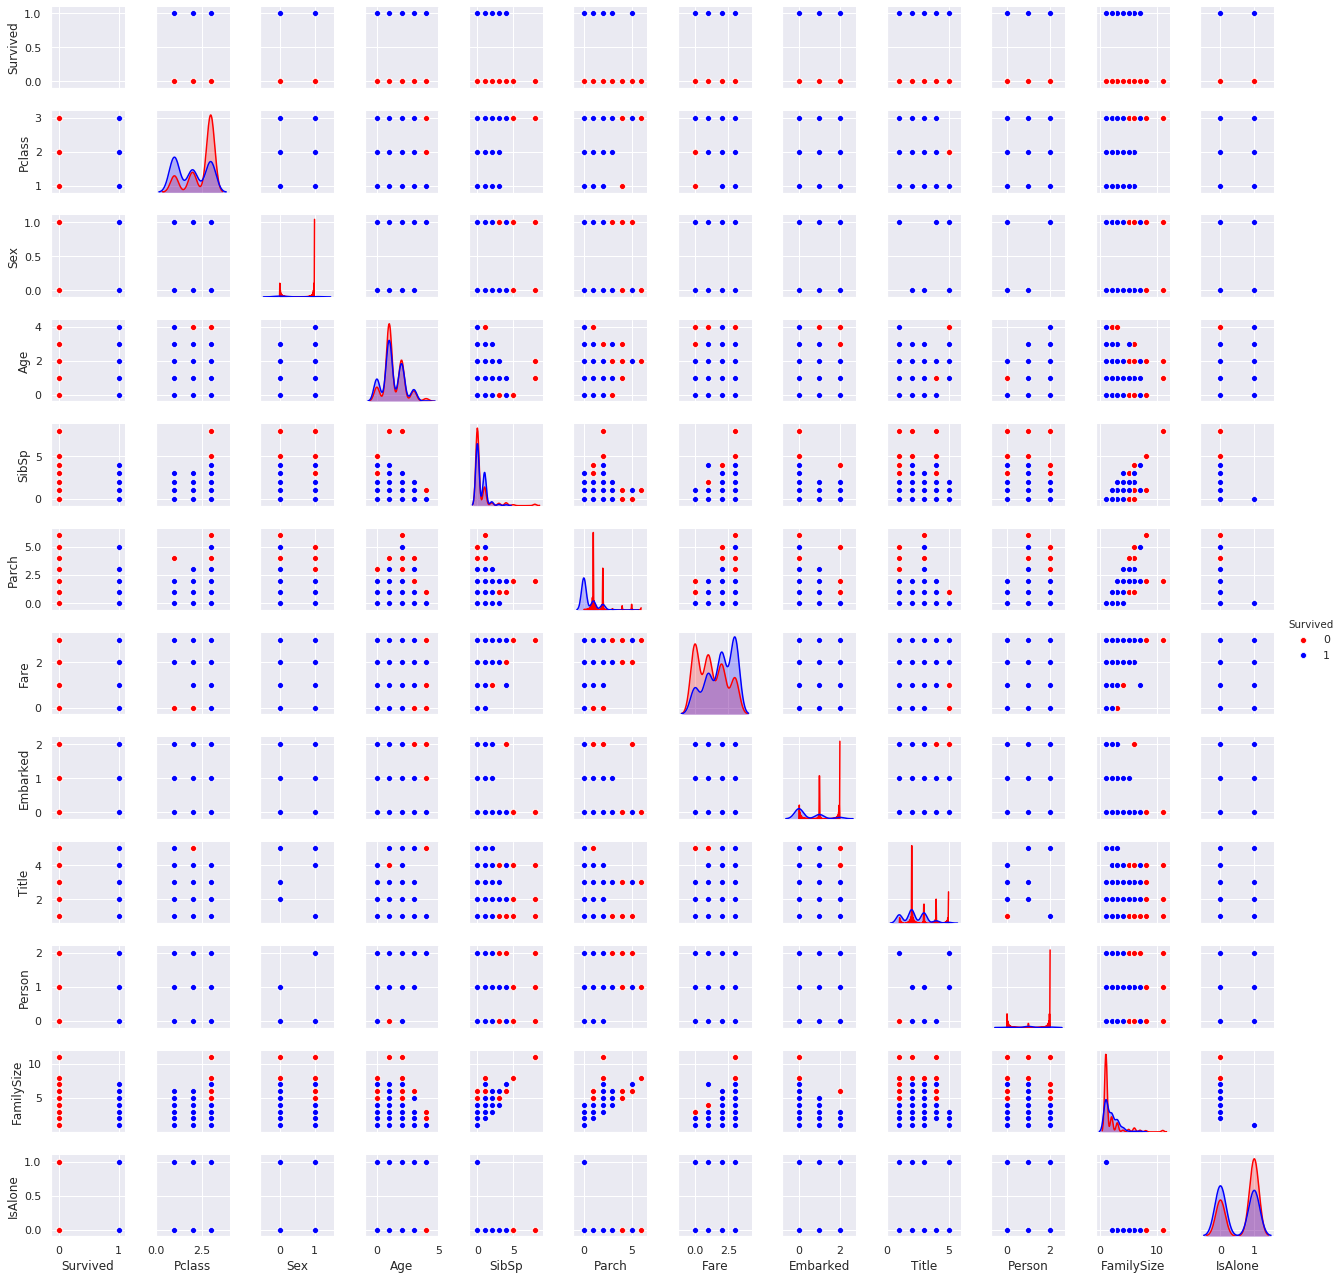

In [276]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'Person', 'FamilySize', 'IsAlone']
g = sns.pairplot(data=train, vars=cols, size=1.5, hue='Survived', palette=['red', 'blue'])
g.set()

Feature Engineering (Feature Selection)

Survived 와 관련이 있는 것은 Pclass와 Fare.

Pclass와 Fare에 관련 있는 것은 Age, Parch, SibSp

In [277]:
train.Age.sample(10)

695    3
6      3
884    1
429    1
337    2
121    1
443    1
642    0
56     1
299    3
Name: Age, dtype: int64

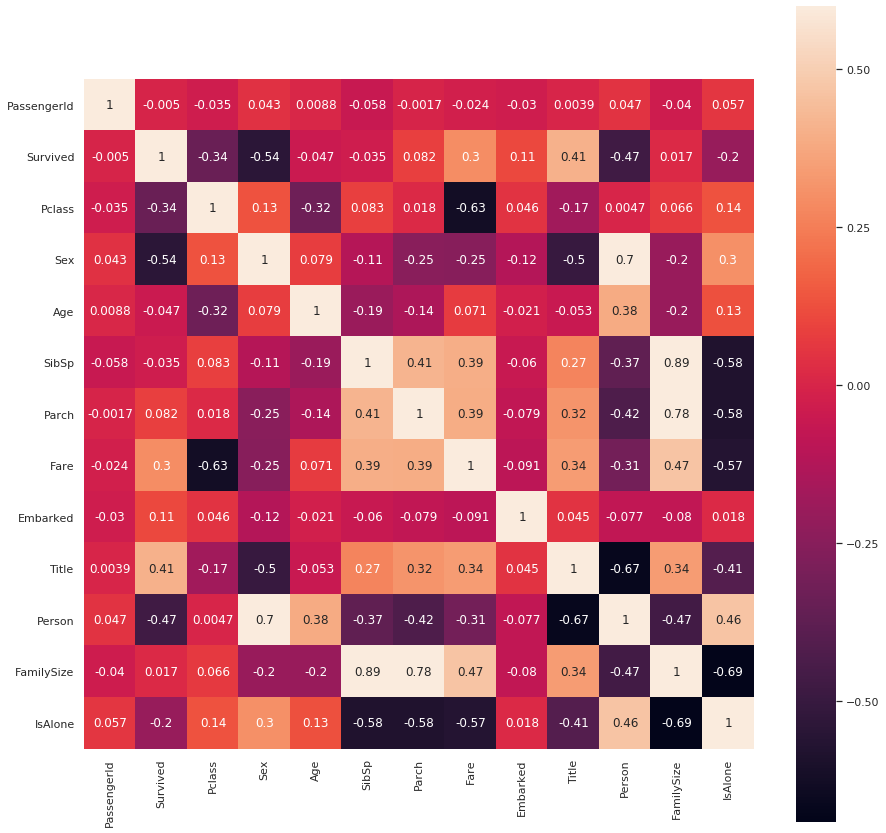

In [278]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

In [281]:
features_drop = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize', 'Sex', 'Title']
train = train.drop(features_drop, axis=1)
train = train.drop(['PassengerId', 'AgeBand', 'FareBand'], axis=1)
train.head()

,Survived,Pclass,Fare,Embarked,Person,IsAlone
0,0,3,0,0,2,0
1,1,1,3,1,1,0
2,1,3,1,0,1,1
3,1,1,3,0,1,0
4,0,3,1,0,2,1


In [0]:
test = test.drop(features_drop, axis=1)

In [283]:
test.head()

,PassengerId,Pclass,Fare,Embarked,Person,IsAlone
0,892,3,0,2,2,1
1,893,3,0,0,1,0
2,894,2,1,2,2,1
3,895,3,1,0,2,1
4,896,3,1,0,1,0


Model Classification

Classification & Accuracy

몇 가지 분류 알고리즘을 이용.

* Logistic Regression
* Support Vector Machine (SVM)
* Linear SVM
* K-Nearest Neighbor (KNN)
* Decision Tree
* Random Forest
* Naive Bayes (Gaussian NB)
* Perceptron
* Stochastic Gradient Descent (SGD)

In [284]:
X_train = train.drop('Survived', axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId', axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

Logistic Regression

In [286]:
clf_log_reg = LogisticRegression()
clf_log_reg.fit(X_train, y_train)
acc_log_reg = round((cross_val_score(clf_log_reg, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_log_reg)+'%')

78.24%


Support Vector Machine (SVM)

In [287]:
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
acc_svc = round((cross_val_score(clf_svc, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_svc) + '%')

81.04%


Linear SVM

In [288]:
clf_linear_svc = LinearSVC() # Linear Support Vector Classification
clf_linear_svc.fit(X_train, y_train)
acc_linear_svc = round((cross_val_score(clf_linear_svc, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_linear_svc) + '%')

78.01%


K-Nearest Neighbors

In [289]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)
acc_knn = round((cross_val_score(clf_knn, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_knn) + '%')

76.01%


Decision Tree

In [290]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
acc_decision_tree = round(clf_dt.score(X_train, y_train)*100, 2)
# acc_decision_tree = round((cross_val_score(clf_dt, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_decision_tree) + '%')

84.4%


In [291]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# acc_decision_tree = round(clf_dt.score(X_train, y_train)*100, 2)
acc_decision_tree = round((cross_val_score(clf_dt, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_decision_tree) + '%')

81.71%


Random Forest

In [292]:
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
acc_random_forest = round((cross_val_score(clf_rf, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_random_forest) + '%')
print(clf_rf.score(X_train, y_train))

80.81%
0.8439955106621774


In [293]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [294]:
X_train.head()

,Pclass,Fare,Embarked,Person,IsAlone
0,3,0,0,2,0
1,1,3,1,1,0
2,3,1,0,1,1
3,1,3,0,1,0
4,3,1,0,2,1


Extremely Randomised Trees

In [297]:
clf_ext_rf = ExtraTreesClassifier(
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10
    # class_weight="balanced",
    # min_weight_fraction_leaf=0.02
)

clf_ext_rf.fit(X_train, y_train)
acc_ext_rf1 = round(clf_ext_rf.score(X_train, y_train)*100, 2)
acc_ext_rf = round((cross_val_score(clf_ext_rf, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_ext_rf) + '%')
print(str(acc_ext_rf1) + '%')

80.7%
84.06%


Bagging (with estimator KNN)

In [298]:
clf_bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=3,
        weights='distance'
    ),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
)
clf_bagging.fit(X_train, y_train)
acc_bagging = round((cross_val_score(clf_bagging, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_bagging) + '%')

80.93%


Gaussian Naive Bayes

In [299]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
acc_gnb = round((cross_val_score(clf_gnb, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_gnb) + '%')
acc_gnb1 = clf_gnb.score(X_train, y_train)
print(acc_gnb1)

71.84%
0.7227833894500562


Perceptron

In [300]:
clf_perceptron = Perceptron(max_iter=5, tol=None)
clf_perceptron.fit(X_train, y_train)
acc_perceptron = round((cross_val_score(clf_perceptron, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_perceptron) + '%')

64.2%


Stochastic Gradient Descent (SGD)

In [301]:
clf_sgd = SGDClassifier(max_iter=5, tol=None)
clf_sgd.fit(X_train, y_train)
acc_sgd = round((cross_val_score(clf_sgd, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_sgd) + '%')

72.08%


Gradient Boosting

In [302]:
clf_gb = GradientBoostingClassifier(
    # loss='exponential',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.5,
    random_state=0
)
clf_gb.fit(X_train, y_train)
acc_gb = round((cross_val_score(clf_gb, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_gb) + '%')

80.26%


XGBoost

In [303]:
clf_xgb = xgb.XGBClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1
)
clf_xgb.fit(X_train, y_train)
acc_xgb = round((cross_val_score(clf_xgb, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_xgb) + '%')

81.27%


LightGBM

In [304]:
clf_lgb = lgb.LGBMClassifier(
    max_depth=2,
    n_estimators=500,
    subsample=0.5,
    learning_rate=0.1
)
clf_lgb.fit(X_train, y_train)
acc_lgb = round((cross_val_score(clf_lgb, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_lgb) + '%')

80.82%


Ada Boosting

In [305]:
clf_ada = AdaBoostClassifier(
    n_estimators=400,
    learning_rate=0.1
)
clf_ada.fit(X_train, y_train)
acc_ada = round((cross_val_score(clf_ada, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_ada) + '%')

78.79%


Stacking Method (Voting Mechanism Principal)

In [306]:
clf_vote = VotingClassifier(
    estimators=[
                # ('tree', clf_dt),
                # ('knn', clf_knn),
                ('svm', clf_svc),
                # ('extra', clf_ext_rf),
                # ('gb', clf_gb),
                ('xgb', clf_xgb),
                ('ada', clf_ada),
                # ('bagging', clf_bagging),
                # ('percep', clf_perceptron),
                # ('logistic', clf_log_reg),
                ('lightgbm', clf_lgb),
                ('RF', clf_rf)
    ],
    weights=[3, 2, 1, 3, 3],
    voting='hard'
)

clf_vote.fit(X_train, y_train)
acc_vote = cross_val_score(clf_vote, X_train, y_train, cv=5, scoring='accuracy')
print("Voting Accuracy: {:.2f}".format(acc_vote.mean()) + "(+/-{:.2f})".format(acc_vote.std()))

Voting Accuracy: 0.82(+/-0.02)


Model Validation

Comparing Model

In [307]:
models = pd.DataFrame(
    {'Model':
        ['Logistic Regression', 
         'Support Vector Machine', 
         'Linear SVM', 
         'KNN', 
         'Decision Tree', 
         'Random Forest', 
         'Extremely Randomised Trees', 
         'Bagging', 
         'Naive Bayes', 
         'Perceptron', 
         'Stochastic Gradient Descent', 
         'Gradient Boosting', 
         'XGBoost', 
         'LightGBM', 
         'Ada Boosting', 
         'Stacking'],
     'Score':
        [acc_log_reg,
         acc_svc,
         acc_linear_svc,
         acc_knn,
         acc_decision_tree,
         acc_random_forest,
         acc_ext_rf,
         acc_bagging,
         acc_gnb,
         acc_perceptron,
         acc_sgd,
         acc_gb,
         acc_xgb,
         acc_lgb,
         acc_ada,
         (acc_vote.mean()*100)]
     }
)
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,81.710000
15,Stacking,81.602359
12,XGBoost,81.270000
1,Support Vector Machine,81.040000
7,Bagging,80.930000
13,LightGBM,80.820000
5,Random Forest,80.810000
6,Extremely Randomised Trees,80.700000
11,Gradient Boosting,80.260000
14,Ada Boosting,78.790000


Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

In [309]:
clf = VotingClassifier(
    estimators=[
                # ('tree', clf_dt),
                # ('knn', clf_knn),
                ('svm', clf_svc),
                # ('extra', clf_ext_rf),
                # ('gb', clf_gb),
                ('xgb', clf_xgb),
                ('ada', clf_ada),
                # ('bagging', clf_bagging),
                # ('percep', clf_perceptron),
                # ('logistic', clf_log_reg),
                ('lightgbm', clf_lgb),
                ('RF', clf_rf)
    ],
    weights=[3, 2, 1, 3, 3],
    voting='hard'
)
clf.fit(X_train, y_train)
y_pred_vote_training_set = clf.predict(X_train)
acc_vote_training_set = round((cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean())*100, 2)
print(str(acc_vote_training_set) + '%')

81.38%


In [310]:
true_class_names = ['True Survived', 'True Not Survived']
pred_class_names = ['Predicted Survived', 'Predicted Not Survived']
cnf_matrix = confusion_matrix(y_train, y_pred_vote_training_set)
df_cnf_matrix = pd.DataFrame(cnf_matrix, index=true_class_names, columns=pred_class_names)
df_cnf_matrix

,Predicted Survived,Predicted Not Survived
True Survived,518,31
True Not Survived,117,225


In [311]:
true_class_names = ['True Survived', 'True Not Survived']
pred_class_names = ['Predicted Survived', 'Predicted Not Survived']
cnf_matrix_percent = cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, index=true_class_names, columns=pred_class_names)
df_cnf_matrix_percent

,Predicted Survived,Predicted Not Survived
True Survived,0.943534,0.056466
True Not Survived,0.342105,0.657895


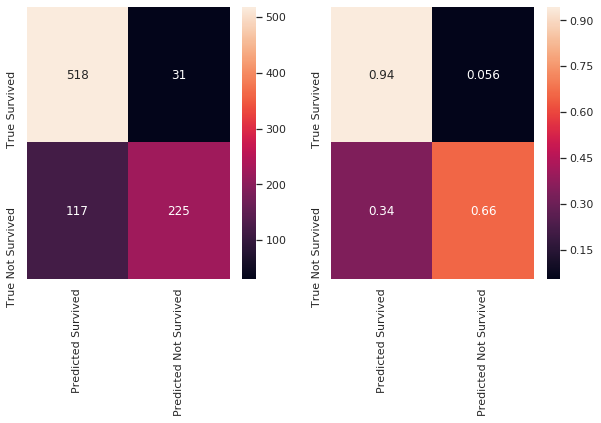

In [312]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

In [317]:
X_test.head()

,Pclass,Fare,Embarked,Person,IsAlone
0,3,0,2,2,1
1,3,0,0,1,0
2,2,1,2,2,1
3,3,1,0,2,1
4,3,1,0,1,0


In [316]:
summary_df = pd.DataFrame(list(zip(X_test.columns,
                                #    clf_log_reg.feature_importances_,
                                #    clf_svc.feature_importances_,
                                #    clf_linear_svc.feature_importances_,
                                #    clf_knn.feature_importances_,
                                   clf_dt.feature_importances_,
                                   clf_rf.feature_importances_,
                                   clf_ext_rf.feature_importances_,
                                #    clf_bagging.feature_importances_,
                                #    clf_gnb.feature_importances_,
                                #    clf_perceptron.feature_importances_,
                                #    clf_sgd.feature_importances_,
                                   clf_gb.feature_importances_,
                                   clf_xgb.feature_importances_,
                                   clf_lgb.feature_importances_,
                                #    clf_vote.feature_importances_,
                                   clf_ada.feature_importances_)),
                          columns=['Feature', 'Tree', 'RF', 'Ext RF', 'GBoost', 'XGBoost', 'lightGB', 'AdaBoost'])
print(summary_df.median())
print(summary_df.median(0))
print(summary_df.median(1))
summary_df['Median'] = summary_df.median(1)
summary_df.sort_values('Median', ascending=False)

Tree          0.080404
RF            0.130915
Ext RF        0.126291
GBoost        0.141569
XGBoost       0.131479
lightGB     262.000000
AdaBoost      0.207500
dtype: float64
Tree          0.080404
RF            0.130915
Ext RF        0.126291
GBoost        0.141569
XGBoost       0.131479
lightGB     262.000000
AdaBoost      0.207500
dtype: float64
0    0.227391
1    0.130915
2    0.086048
3    0.543894
4    0.044959
dtype: float64


,Feature,Tree,RF,Ext RF,GBoost,XGBoost,lightGB,AdaBoost,Median
3,Person,0.602605,0.552994,0.543894,0.507615,0.360562,452,0.2750,0.543894
0,Pclass,0.244835,0.210777,0.224931,0.227391,0.255869,253,0.1450,0.227391
1,Fare,0.080404,0.130915,0.126291,0.141569,0.121389,417,0.2950,0.130915
2,Embarked,0.027197,0.062717,0.060362,0.086048,0.131479,262,0.2075,0.086048
4,IsAlone,0.044959,0.042597,0.044522,0.037377,0.130701,116,0.0775,0.044959


Submission File Output

In [318]:
test.head()

,PassengerId,Pclass,Fare,Embarked,Person,IsAlone
0,892,3,0,2,2,1
1,893,3,0,0,1,0
2,894,2,1,2,2,1
3,895,3,1,0,2,1
4,896,3,1,0,1,0


In [0]:
y_pred_vote = clf_vote.predict(X_test)

In [0]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred_vote})

In [321]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [0]:
submission.to_csv('./submission_output.csv', index=False)